In [2]:
from google.colab import files
uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('AB_NYC_2019.csv')

In [16]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
# Missing values
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [19]:
df.dropna().isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [20]:
# Fill NA in reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

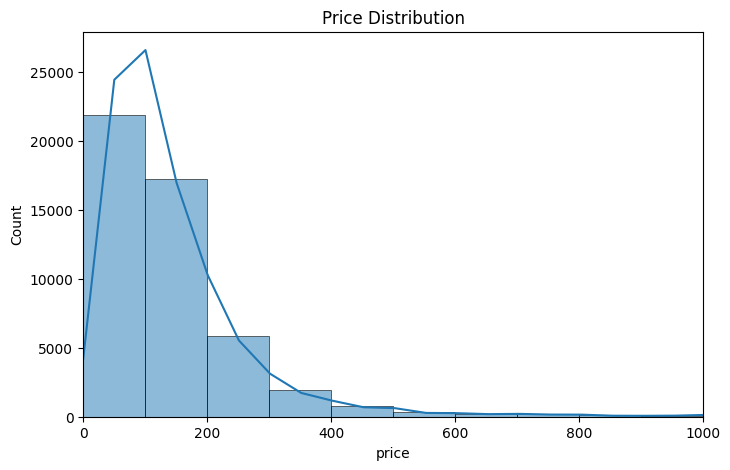

In [21]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title("Price Distribution")
plt.show()

In [22]:
# Outlier removal
df = df[df['price'] < 1000]

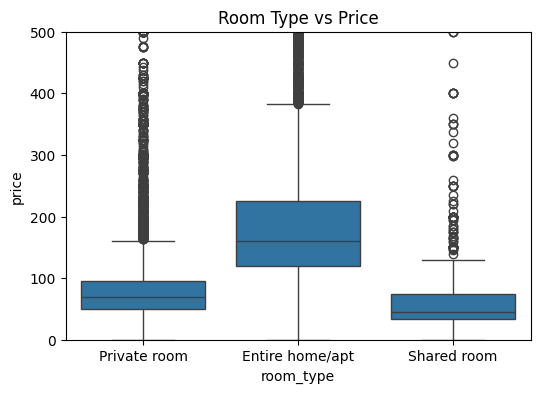

In [24]:
# Room type vs Price
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='room_type', y='price')
plt.title("Room Type vs Price")
plt.ylim(0, 500)
plt.show()

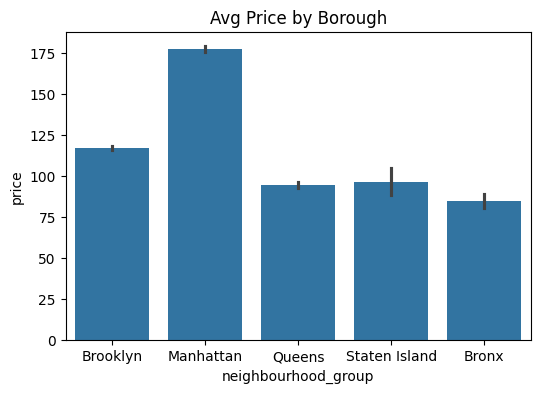

In [25]:
# Average price per borough
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='neighbourhood_group', y='price')
plt.title("Avg Price by Borough")
plt.show()

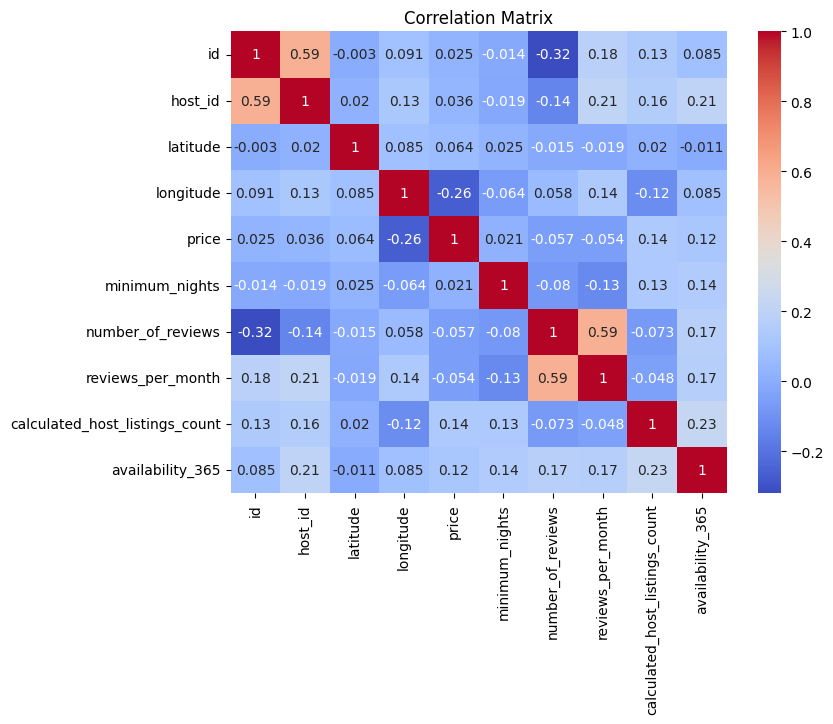

In [26]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [27]:
# Encode categorical features
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [28]:
# Define features and target
X = df.drop(['price', 'neighbourhood'], axis=1)
y = df['price']


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

# Only numeric features
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Fill missing values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train models
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
gbr = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42, verbosity=0).fit(X_train, y_train)

# Predictions
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
gbr_preds = gbr.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Evaluation function
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 2)
    }

# Collect results
results = [
    evaluate_model("Linear Regression", y_test, lr_preds),
    evaluate_model("Random Forest", y_test, rf_preds),
    evaluate_model("Gradient Boosting", y_test, gbr_preds),
    evaluate_model("XGBoost", y_test, xgb_preds)
]

# Show evaluation
pd.DataFrame(results)


,Model,MAE,RMSE,R2 Score
0,Linear Regression,69.29,102.52,0.10
1,Random Forest,57.79,89.32,0.32
2,Gradient Boosting,59.43,91.78,0.28
3,XGBoost,57.85,89.70,0.31
